# **SARCASM DETECTION FOR IMDB MOVIE REVIEW USING DEEP LEARNING MODEL**

##**Business Problem**
- The movie industry heavily relies on audience reviews for a film's success in theaters.
- Understanding and analyzing these reviews is crucial for providing accurate ratings and overall opinions on movies
- However, some reviewers express their thoughts sarcastically, which can mislead traditional sentiment analysis models.

##**Solution Proposed**

- To address the challenge of sarcasm detection, we need to develop and implement deep learning models specifically designed to recognize and interpret sarcastic reviews.
- By incorporating sarcasm detection into sentiment analysis, we can significantly enhance the accuracy of review analysis.


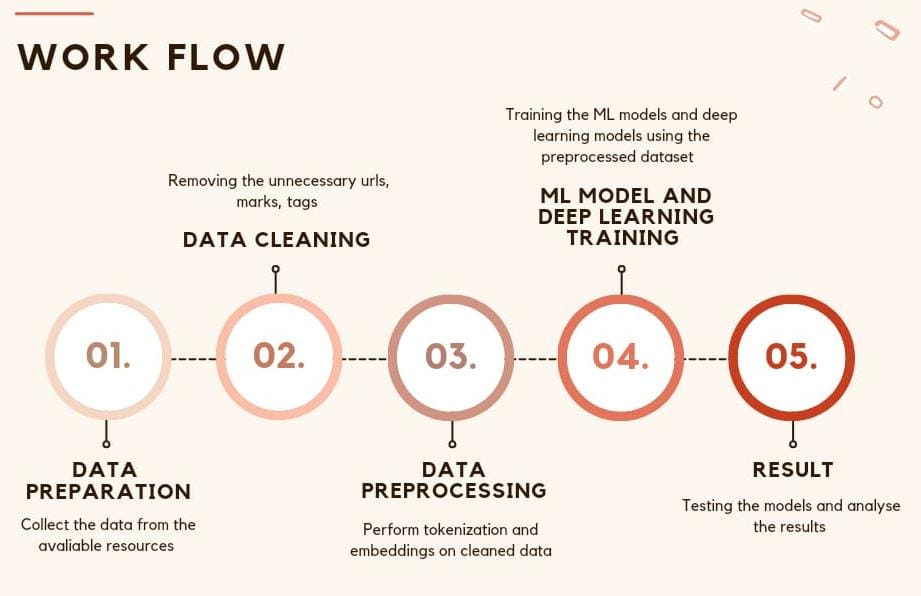

#**1. DATA PREPARATION**

The input Dataset reviews are analysed and following opeartions on the dataset:

1.  Removing duplicate reviews.

2.  Removing Null valued labels.

3.  Handling the label column for uniformity.

4.  Analysing the length of reviews and no.of unique labels in the dataset.

5.  Spliting the dataset into Train , Test , Validation data for further model trainings


**Length of reviews**

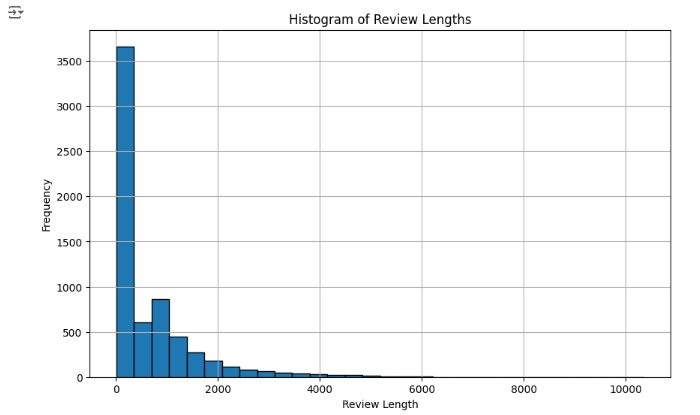


**no.of unique labels**

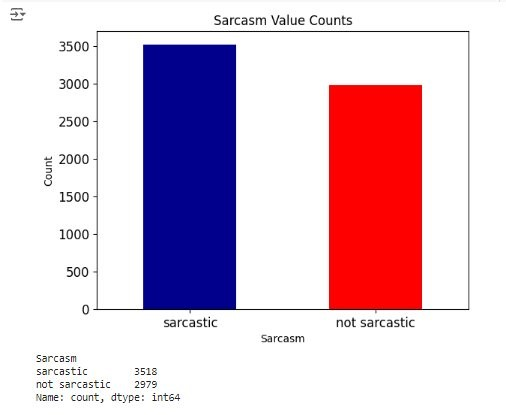


**Split of data into Train , Test , Validation data**

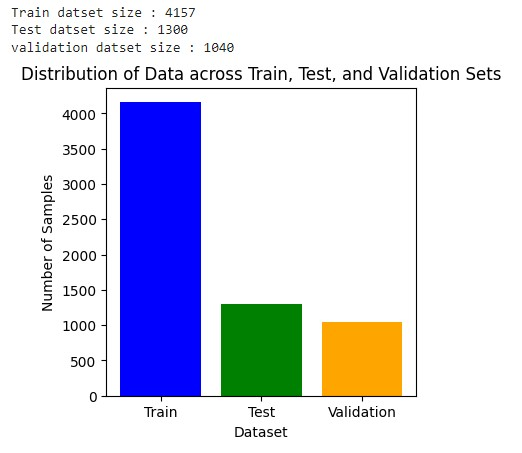


#**2. DATA CLEANING**

Cleaning the input Dataset reviews by performing the following steps:

1.  Removing HTML tags from reviews.

2.  Removing URLs from reviews.

3.  Removing specified punctuation marks from reviews.

4.  Removing extra white spaces from reviews.





# **3. DATA PREPROCESSING**

We will follow the following methods in order for preprocessing the data :


1.   Stop words removal
2.   Lemmatization
3.   Tokenization
4.   Input data Embeddings
5.   Checking for dataset imbalance


# **4. Model Training**
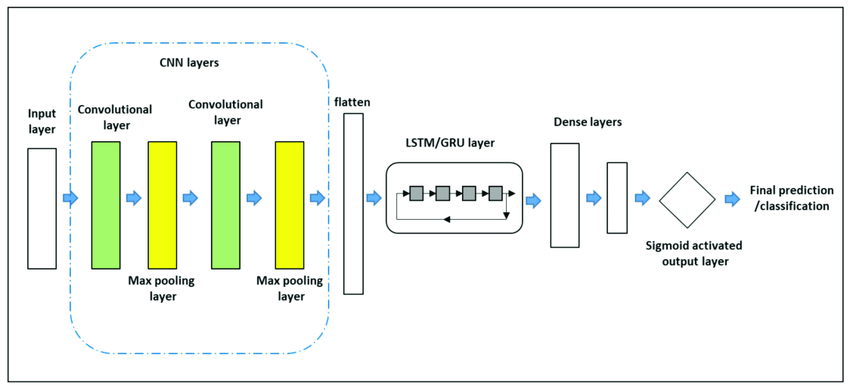
- Among the various ML models like  logistic regression, Naive Bayes, decision tree, Random Forest and few deep learning model like  Neural Networks (NN), Convolutional Neural Networks (CNN), Long Short-Term Memory (LSTM), Gated Recurrent Unit (GRU), and BERT models , GRU model stood out best for our dataset

- A Gated Recurrent Unit (GRU) is a type of recurrent neural network (RNN) architecture designed to handle sequential data and address the vanishing gradient problem found in traditional RNNs.

- GRU CELL processing

1. Input Reception

2. If the update gate decides to keep a lot of past information, it will allow more of the previous hidden state to pass through.

3. If the reset gate decides to forget a lot, it will erase much of the previous hidden state.

4. The GRU cell processes the current input and the modified past information (after considering update and reset gates) to create a new candidate hidden state.

5. The update gate then combines the new candidate hidden state and the past hidden state (based on how much information to retain) to form the final hidden state for the current time step.



#**5. Conclusion**
- The GRU-based model demonstrates strong performance, achieving an overall accuracy of 82% on the dataset, with balanced precision and recall across both classes.

- The GRU model is particularly effective because it combines simplicity and efficiency, making it faster to train and less computationally intensive than LSTM models

- The GRU effectively manages the vanishing gradient problem and captures long-term dependencies in sequential data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dataset.xlsx')

In [ ]:
import re
import string

**Cleaning data**

In [ ]:
def clean_text(text):
    # Compile regular expressions for HTML tags and URLs , defining punctuation marks to remove
    html_pattern = re.compile('<.*?>')
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    punctuation_to_remove = ''.join(p for p in string.punctuation if p not in ['?', '!', '.'])

    # Remove HTML tags,urls,punctuation marks
    text = html_pattern.sub('', text)
    text = url_pattern.sub('', text)
    text = text.translate(str.maketrans('', '', punctuation_to_remove))

    # Remove extra white spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

**Data Preprocessing**

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def process_review(review):
    # Remove stopwords
    filtered_words = [word for word in review.split() if word.lower() not in stop_words]
    filtered_sentence = ' '.join(filtered_words)

    # Perform lemmatization
    words = filtered_sentence.split()
    pos_tags = pos_tag(words)
    lemmatized_sentence = ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags])

    return lemmatized_sentence


**Tokenization and Embeddings**

In [ ]:
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [ ]:
# Tokenizer and padding
tokenizer = Tokenizer()

**GRU DEEP LEARNING MODEL**

In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/GRU_model.h5')

**Prediction**

In [ ]:
def predict_new_data(text, model_gru, tokenizer, max_length):
    # Preprocess the new data
     text_cleaned = clean_text(text)
     processed_review = process_review(review)
     # Tokenize and pad the new data
     new_data_seq = tokenizer.texts_to_sequences(processed_review)
     new_data_padded = pad_sequences(new_data_seq, padding='post', maxlen=max_length)
     # Predict using GRU model
     gru_predictions = model.predict(new_data_padded)
     predictions = np.where(gru_predictions > 0.5, 1, 0).flatten()
     if predictions[0] == 1:
        return "Sarcastic"
     else:
        return "Not Sarcastic"

In [ ]:
review= "This installment suffers from a convoluted plot and excessive length, leaving viewers confused and exhausted. The over-reliance on special effects overshadows any meaningful character development, making it feel like a cash grab rather than a cohesive story."
print("actual : Sarcastic")
c=predict_new_data(review, model, tokenizer, 944)
print(c)


actual : Sarcastic
7/7 [==============================] - 23s 3s/step
Sarcastic
